# To utvalgs Hypotesetest

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

Jeg vil her gi et eksempel på en annen form for hypotesetest som tar utgangspunkt i
temperaturene i Bergen vi studerte i første uken av dette kurset.

Temperaturene ser ut til å ha økt i perioden vi har
målinger for.

La oss gjette på at temperaturen har økt med mere enn en grad i
gjennomsnitt.

Nå vil jeg gjøre utsagnet at på en tilfeldig dag i de siste ti årene
er temperaturen mere enn en grad høyere
enn den var på en tilfeldig dag i perioden fra for 50 år siden til for 40 år siden.

Jeg vil også bruke de daglige temperaturmålingene i de siste 3653
dagene (de siste ti årene) og de 3653 dagene som var 40 år tidligere
for å teste denne hypotesen.

Til forskjell fra i forrige eksperiment ignorerer jeg imformasjon om dato og hvilke dager som
faller på samme kalenderdag.

For $i = 1, \dots, 3653$ la $y_i$ være temperaturen for $10$ år minus $i$ dager siden.
Tilsvarende vil jeg la $z_i$ være $1 \ C^{\circ}$ plus temperaturen for $50$ år minus $i$ dager siden.

Jeg antar at tallene $y_i$ er trukket fra en sannsynlighetsfordeling med gjennomsnitt $\mu_1$
og at
at tallene $z_i$ er trukket fra en sannsynlighetsfordeling med gjennomsnitt $\mu_2$.

Mitt gjett er at
tallet $\mu_1 > \mu_2$.

Jeg vil gjøre en hypotesetest for å se om jeg må forkaste nullhypotesen $\mu_1 = \mu_2$.

**Antatte gjennomsnittsverdier** $\mu_1$ og $\mu_2$

**Nullhypotese ($H_0)$:** $\mu_1 = \mu_2$.

**Alternativ hypotese ($H_1$):** $\mu_1 > \mu_2$.

## To utvalgs t-test

La $n_1$ være antallet av observasjoner i utvalget $y$ og la $n_2$ være antallet av observasjoner i utvalget $z$. For oss er $n_1 = n_2 = 3053$.

La $E(y)$ være gjennomsnittet til tallene $y_i$ og la $E(z)$ være gjennomsnittet til tallene $z_i$. Vi kommer igjen til å gi en formel for en $t$-verdi.

For å skrive formelen litt fint vil jeg innføre det kombinerte standardavviket
$$\sigma(y,z) = \sqrt{\frac{(n_1 - 1)\sigma(y)^2 + (n_2 - 1)\sigma(z)^2}{n_1 + n_2 + 2}}.$$
Husk gjerne at standardavviket $\sigma(y)$ er gitt ved formelen $\sigma(y)^2 = E(y^2) - E(y)^2$.

$t$-verdien for vår to utvalgs test er:

$$t\_{\text{verdi}} = \frac{E(y) - E(z)}{\sigma(y, z) \sqrt{1/n_1 + 1/n_2}}$$

Vi laster inn temperaturdata og ser om denne t-verdien gir anledning til å forkaste nullhypotesen vår.

## Temperaturdata

In [2]:
# Her importeres Point og Daily funksjonalitetene fra meteostat modulen.
# Hvis meteostat ikke allerede er installert blir den installert.
try:
  import meteostat
except:
  !pip install meteostat
  import meteostat

In [3]:
# Her importeres modulen pandas som pd sammen med numpy og matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t



In [4]:
# Her importeres funksjonaliteten datetime fra modulen datetime.
# Datetime gir oss en bekvem måte å jobbe med tidsdate på.

from datetime import datetime, timedelta

In [5]:
# Sett tidsperioden vi vil hente data fra
# Data for fremtiden kan ikke lastes inn, så når vi ber om å laste inn data får vi data helt opp til i dag.

start = datetime(1973, 1, 1)
end = datetime.today()

In [6]:
# Målestasjon Florida Bergen
# Vi laster ned daglige målinger for den angitte tidsperioden
data = meteostat.Daily('01317', start, end)
data = data.fetch()

In [7]:
# setter endedato til å være siste dag vi har data for
end = data.index[-1]

In [8]:
# Vi setter gårdsdagens temperatur inn på dagene der temperatur mangler:
data['tavg_ffill'] = data['tavg'].ffill()

In [5]:
# Sett tidsperioden vi vil hente data fra
# Data for fremtiden kan ikke lastes inn, så når vi ber om å laste inn data får vi data helt opp til i dag.

start = datetime(1973, 1, 1)
end = datetime.today()


In [7]:
# Målestasjon Florida Bergen
# Vi laster ned daglige målinger for den angitte tidsperioden
data = meteostat.Daily('01317', start, end)
data = data.fetch()

In [8]:
# setter endedato til å være siste dag vi har data for
end = data.index[-1]

In [9]:
data = data.reindex(pd.date_range(start, end))

In [10]:
# Vi setter gårdsdagens temperatur inn på dagene der temperatur mangler:
data['tavg_ffill'] = data['tavg'].ffill()

In [9]:
årlig_gjennomsnittstemperatur = pd.DataFrame(data['tavg_ffill'].groupby(data.index.year).mean())

In [10]:
z = årlig_gjennomsnittstemperatur.loc[1973:1983].values + 1

In [11]:
y = årlig_gjennomsnittstemperatur.loc[2014:2024].values

In [12]:
# Lager pandas dataframe med temperaturene i de to utvalgene
# Dette for å ha funksjonaliteten til pandas tilgjengelig.

data2 = pd.DataFrame(index=årlig_gjennomsnittstemperatur.loc[2014:2024].index)
data2['gamle_temperaturer'] = z
data2['nye_temperaturer'] = y

<Axes: xlabel='time'>

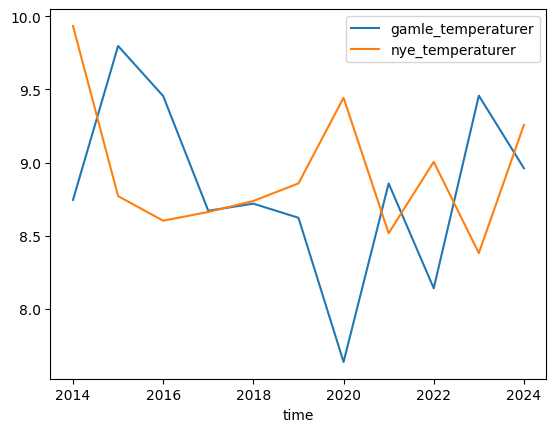

In [13]:
data2.plot(y=['gamle_temperaturer', 'nye_temperaturer'])

## Kriterier for hypotesetest

For å teste hypotesen om temperaturforskjeller vil jeg bruke en $t$-test. Jeg har ett
utvalg av temperaturforskjeller $y_1, \dots, y_{3653}$, og nullhypotesen
er at disse tallene er trukket fra en normalfordeling med gjennomsnitt $1 \ C^{\circ}$.
Den alternative hypotesen er at tallene er trukket fra en normalfordeling med gjennomsnitt
mindre enn $1 \ C^{\circ}$.

En forutsetning for å kunne bruke en $t$-test er at observasjonene er
normalfordelte. Jeg vet ikke på forhånd om temperaturforskjellene er normalfordelte,
men jeg kan danne meg en formening om dette ved å se på et histogram.
Jeg kan finne normalfordelingskurven som passer best til
mitt data og sammenligne de to.

Hvis det ser bra ut kan jeg fortsette. Ellers må jeg finne en annen
metode eller en annen hypotese.

**Sjekker på data:**

Plotter først et histogram av gamle temperaturer.

(Teller hvor mange datapunkter i hvert delintervall i en oppdeling av intervallet av observerte verdier.)

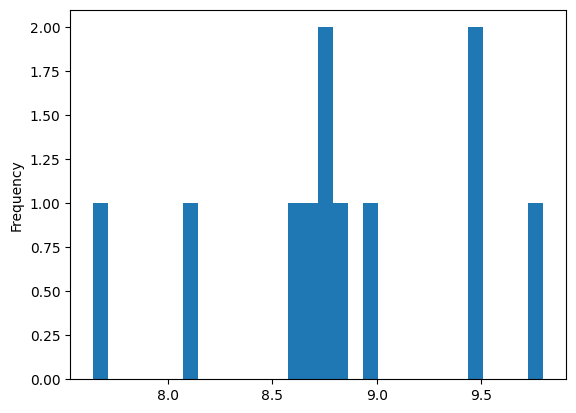

In [14]:
# Plotter histogram av temperaturdifferanser.
data2['gamle_temperaturer'].plot.hist(bins=30)
xmin, xmax = plt.xlim()

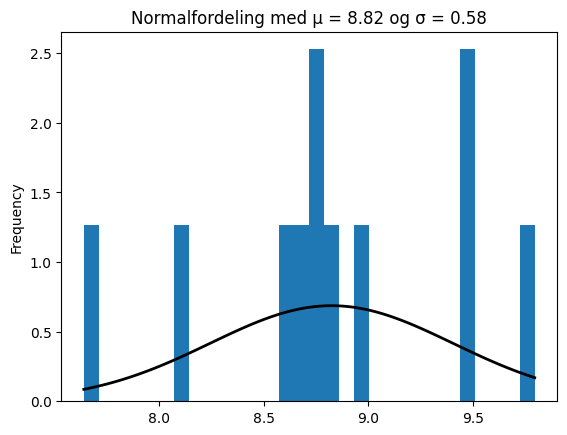

In [15]:
mu, std = scipy.stats.norm.fit(data2['gamle_temperaturer'])
data2['gamle_temperaturer'].plot(kind='hist', bins=30, density=True)
range = np.arange(-10, 10, 0.01)
# plt.plot(range, norm.pdf(range,0,4))
xmin = np.min(z)
xmax = np.max(z)
#xmin, xmax = plt.xlim()
plt.plot(np.linspace(xmin, xmax, 100), scipy.stats.norm.pdf(np.linspace(xmin, xmax, 100), mu, std), 'k', linewidth=2)
title = "Normalfordeling med μ = {:.2f} og σ = {:.2f}".format(mu, std)
plt.title(title);

Dette ser ikke bra ut! Normalfordelingen har ikke to topper.

Hva med de nyere temperaturene?

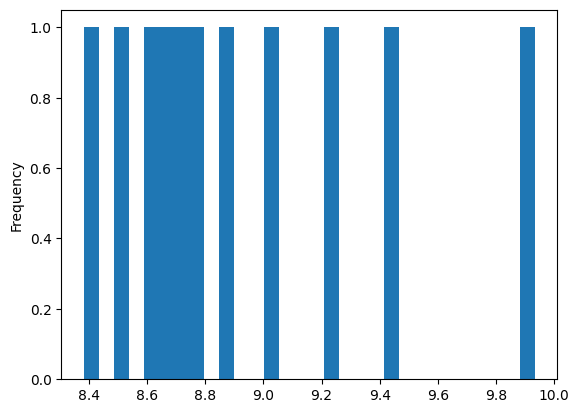

In [16]:
# Plotter histogram av temperaturdifferanser.
data2['nye_temperaturer'].plot.hist(bins=30)
xmin, xmax = plt.xlim()

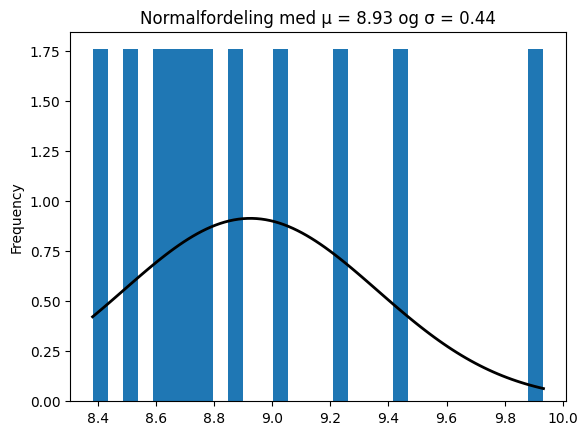

In [17]:
mu, std = scipy.stats.norm.fit(data2['nye_temperaturer'])
data2['nye_temperaturer'].plot(kind='hist', bins=30, density=True)
range = np.arange(-10, 10, 0.01)
# plt.plot(range, norm.pdf(range,0,4))
xmin = np.min(y)
xmax = np.max(y)
#xmin, xmax = plt.xlim()
plt.plot(np.linspace(xmin, xmax, 100), scipy.stats.norm.pdf(np.linspace(xmin, xmax, 100), mu, std), 'k', linewidth=2)
title = "Normalfordeling med μ = {:.2f} og σ = {:.2f}".format(mu, std)
plt.title(title);

Heller ikke bra! **Vi fortsetter selv om vi egentlig burde gi oss her!**

## Beregning av t-verdier

**Repetisjon:**
La $E(y)$ være gjennomsnittet til tallene $y_i$ og la $E(z)$ være gjennomsnittet til tallene $z_i$. Vi kommer igjen til å gi en formel for en $t$-verdi.
For å skrive formelen litt fint vil jeg innføre det kombinerte standardavviket
$$\sigma(y,z) = \sqrt{\frac{\sigma(y)^2 + \sigma(z)^2}{2}}.$$
Husk gjerne at standardavviket $\sigma(y)$ er gitt ved formelen $\sigma(y)^2 = E(y^2) - E(y)^2$.

Lar vi $n = 3053$ være antallet av observasjoner i de to utvalgene er $t$-verdien for vår to utvalgs test:

$$t\_{\text{verdi}} = \frac{E(y) - E(z)}{\sigma(y, z) \sqrt{2/n}}$$

In [18]:
# Beregner t-verdi i python

n = len(y)
Ey = np.mean(y)
Ez = np.mean(z)
sigmayz = np.sqrt((np.mean(y**2) - Ey**2 + np.mean(z**2) - Ez**2)/2)
t_verdi = (Ey - Ez)/(sigmayz*np.sqrt(2/n))

In [19]:
t_verdi

np.float64(0.45793877439084407)

Teorien for normalfordelte observasjoner forutsier at $t$-verdien vi nettopp beregnet vil fordele seg etter en $t$-fordeling med $2n-1$ frihetsgrader.

$t$-fordelingen er tilnærmet lik normalfordelingen med standardavvik $1$ og gjennomsnitt $0$ når antallet av frihetsgrader er stort.

## Overgang fra t-verdi til sannsynlighet, eller p-verdi

Vi antar at temperaturene i utvalgene $y$ og $z$ er fordelt etter en normalfordeling med gjennomsnittsverdier $\mu_1$ og $\mu_2$.

Gitt en $t$-verdien $t\_\text{verdi}$ og antallet av frihetsgrader kan vi finne sannsynligheten for at $\mu_1 > \mu_2$.

og sannsynligheten for at $\mu > \mu_0$ som vi gjorde i sted. Sannsynligheten for at $\mu \ne \mu_0$ er summen av disse sannsynlighetene.

Hvis sannsynligheten for nullhypotesen $H_0$: $\mu \le \mu_0$ er veldig liten velger vi å forkaste nullhypotesen.

Vi må på forhånd bestemme oss for hva vi mener med veldig liten.

Et typisk valg er "mindre en 5%".

I vårt tilfelle er $t\_\text{verdi}$ og antall frihetsgrader gitt ved:

In [20]:
# t-verdi og antall frihetsgrader

antall_frihetsgrader = 2*len(y) - 1
float(t_verdi), antall_frihetsgrader

(0.45793877439084407, 21)

Arealet til det røde området på figuren under er sannsynligheten for at nullhypotesen er sann.

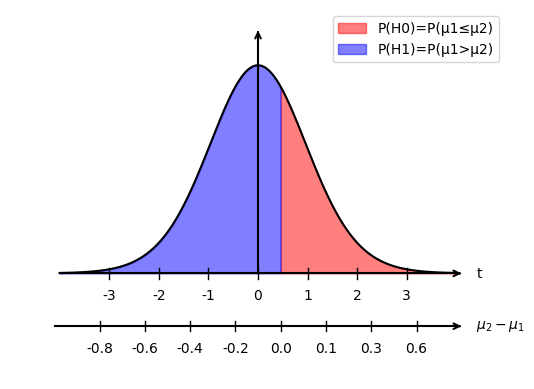

In [21]:
# @title plot
import matplotlib.pyplot as plt
import numpy as np

# Define the function
x = np.linspace(-4, 4, 1000)
yy = scipy.stats.t.pdf(x, antall_frihetsgrader)  # t-fordeling med 10 frihetsgrader
t_crit = t_verdi

def t_av_mu(m):
    return (Ey -Ez - m)/(sigmayz*np.sqrt(2/n))
# def mu_av_t(t):
#     return Ey - t*(sigmay/np.sqrt(len(y)))

ax = plt.gca()


plt.plot(x, yy, color='black')
plt.fill_between(x, yy, where=(x > t_crit), color='red', alpha=0.5, label=r'P(H0)=P(μ1≤μ2)')
plt.fill_between(x, yy, where=(x < t_crit), color='blue', alpha=0.5, label=r'P(H1)=P(μ1>μ2)')
# Remove default spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Set limits
ax.set_xlim(-5, 5)
ax.set_ylim(-.2, .5)  # Ensure axes are visible

# Draw the primary x-axis (for x) with an arrow
ax.plot([-4, 4], [0, 0], color="black", lw=1.5)
ax.annotate("", xy=(4.1, 0), xytext=(4., 0),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
ax.text(4.4, 0, r"t", verticalalignment="center")

# Draw the secondary x-axis (for -x) with an arrow
ax.plot([-4.1, 4], [-.1, -.1], color="black", lw=1.5)
ax.annotate("", xy=(4.1, -.1), xytext=(4., -.1),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
ax.text(4.4, -.1, r"$\mu_2 - \mu_1$", verticalalignment="center")

# Draw the y-axis with an arrow
ax.plot([0, 0], [0, .45], color="black", lw=1.5)
ax.annotate("", xy=(0, .46), xytext=(0, .45),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
#ax.text(-0.3, .45, r"$y$", verticalalignment="center")

# Set x-ticks for t-axis
ticks = np.arange(-3, 4, 1)  # Tick positions

# Draw ticks for t-axis
for t in ticks:
    ax.plot([t, t], [-.01, .01], color="black", lw=1)  # Small tick marks
    ax.text(t, -.05, f"{t}", fontsize=10, ha="center")  # Labels below ticks

# Set ticks for $\mu$-axis
mu_verdier = np.arange(-0.6, 1, .2)
muticks = [t_av_mu(mu) for mu in mu_verdier]
# muticks = [mu_av_t(t) for t in ticks]
# Draw ticks for secondary x-axis (-x)
for t, mu in zip(muticks, mu_verdier):
    ax.plot([t, t], [-.11, -.09], color="black", lw=1)  # Small tick marks
    ax.text(t, -.15, f"{int(-10*mu)/10:.1f}", fontsize=10, ha="center")  # Labels below ticks

# Remove y-ticks
ax.set_yticks([])
ax.set_xticks([])
plt.legend()
plt.show()


Nullhypotesen $\mu_1 = \mu_2$ (eller $\mu_1 \le \mu_2$) forkastes når sannsynligheten for alternativ hypotese $H_1$: $\mu_1 > \mu_2$ er minst $95 \%$. Det er det samme som at sannsynligheten for $H_0$ er høyst $5 \%$.

I gitt fall sier vi at nullhypotesen forkastes med $5 \%$ signifikansnivå.

Som for normalfordelingen kan scipy hjelpe oss med å finne dette arealet:

In [22]:
# p-verdi
1 - scipy.stats.t.cdf(t_verdi, df=antall_frihetsgrader)

np.float64(0.32584978897200245)

In [23]:
# Siden t-funksjonen er symmetrisk fås samme verdi ved å integrere frem til -t_verdi
p_verdi = scipy.stats.t.cdf(-t_verdi, antall_frihetsgrader)

In [24]:
#vi får p-verdien

float(100 * p_verdi)

32.584978897200244

Vi kan altså **ikke** forkaste nullhypotesen som sier at temperaturen i Bergen ikke er steget med mere enn en grad celsius med et signifikansnivå på 5%.

**Konklusjon:**

Vi vet ikke om temperaturen i Bergen er steget med mere enn en grad per 40 år.

I en forelesning som kommer ganske snart vil vi se om vi kan komme til samme konklusjon ved å gjøre en t-test på stignigstallet i regresjonslinjen vi fant for disse temperaturdata.

[Test av stigningstall for regresjonslinje](testhelding.ipynb)